<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning-KISD-2024/blob/main/lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 7**


##**<font color = "green">Reinforcement learning</font>**

*24 April 2024*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**


* ###  <font color='red'>Reinforcement learning: how to train a robot?


<br>


**As always all slides are here:**

*https://github.com/marcinwolter/MachineLearning-KISD-2024*

<br>




# <font color='green'> **Autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [ ]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.python.keras.layers import Layer, InputSpec
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import sklearn.metrics



# Read MNIST data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train = x_train / 255.
x_test = x_test / 255.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Hyperparameters

In [ ]:
encoding_dim = 2
batch_size = 128
epochs = 50 #200

 # Build autoencoder



In [ ]:

# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
#decoded = Dropout(0.2)(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
 dense_8 (Dense)             (None, 256)               768       
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dense_10 (Dense)            (None, 784)               4021

# Train the autoencoder

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 5s 5ms/step - loss: 0.2322 - val_loss: 0.2021
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1972 - val_loss: 0.1936
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1912 - val_loss: 0.1887
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1872 - val_loss: 0.1856
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1844 - val_loss: 0.1833
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1820 - val_loss: 0.1804
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1799 - val_loss: 0.1791
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1779 - val_loss: 0.1773
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1765 - val_loss: 0.1763
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1754 - val_loss: 0.1752

# Plot history

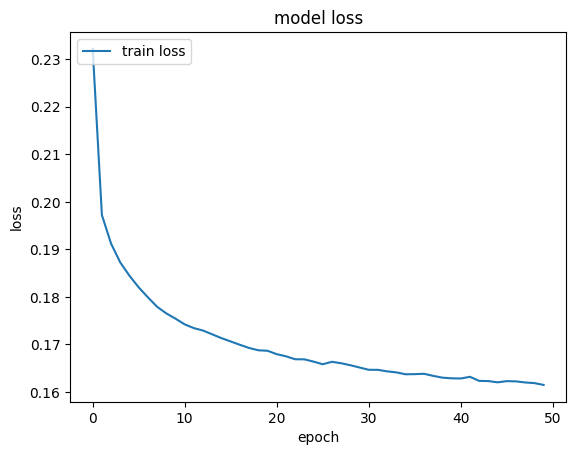

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper left')
plt.show()

# Plot clusters

313/313 [==============================] - 0s 1ms/step
(10000, 2)


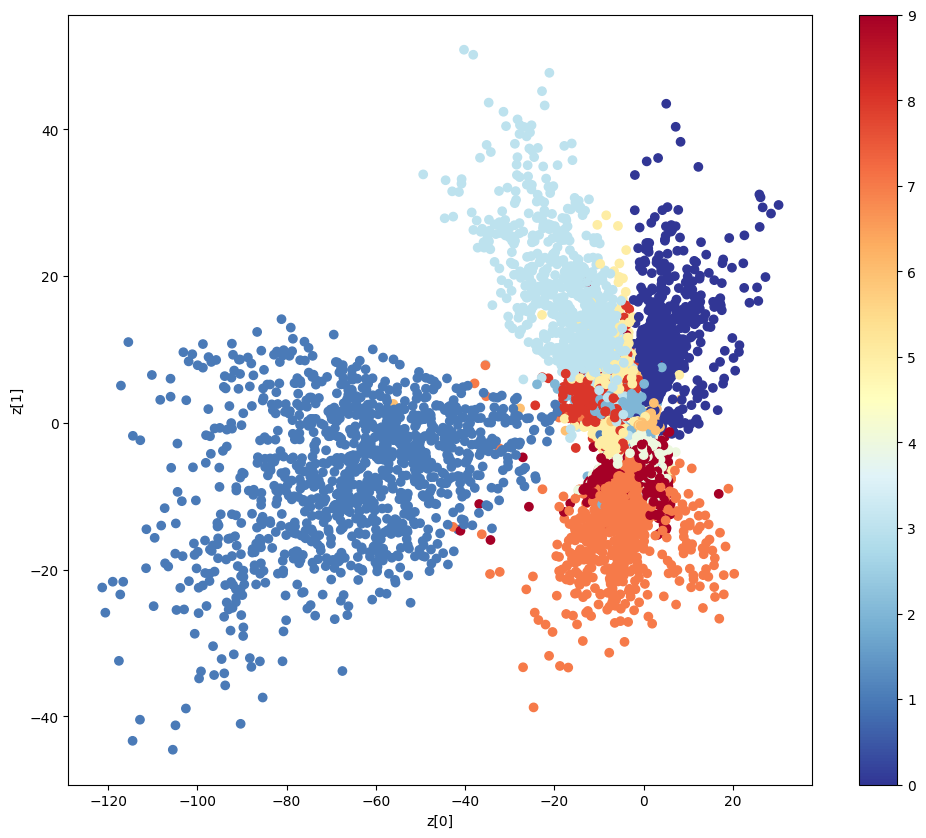

In [ ]:
import matplotlib.pyplot as plt

def plot_label_clusters(encoded, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z = encoder.predict(data.reshape(len(data),784))
    print(z.shape)
    plt.figure(figsize=(12, 10))
    plt.scatter(z[:, 0], z[:, 1], c=labels, cmap="RdYlBu_r")
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()




plot_label_clusters(encoded, x_test, y_test)

# Plot digits

313/313 [==============================] - 1s 2ms/step


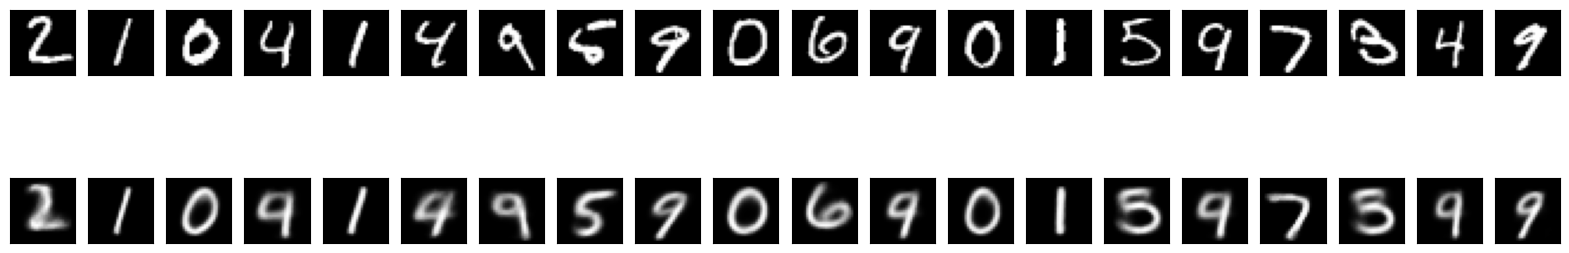

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **What else could we do with autoencoders?**

### For example: <font color='green'>image denoising.


#**Denoising Autoencoders (DAE)**
This type of Autoencoder is an alternative to the concept of regular Autoencoder we just discussed, which is prone to a high risk of overfitting. In the case of a Denoising Autoencoder, the data is partially corrupted by noises added to the input vector in a stochastic manner. Then, the model is trained to predict the original, uncorrupted data point as its output.

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/0*ECdHu2yeal38Jl3P.png' width=700px>

Let’s explain the training process at stake here.

* An input is sampled from our dataset.
* A corrupted version of this input is sampled from a stochastic mapping M( ̃x|x)
* (x, ̃x) is used as a training example

# Autoencoder for image denoising

**Author:** [Santiago L. Valdarrama](https://twitter.com/svpino)<br>
Modified by M.Wolter<br>
**Date created:** 2021/03/01<br>
**Last modified:** 2023/04/17<br>
**Description:** How to train a deep convolutional autoencoder for image denoising.

## Introduction

This example demonstrates how to implement a deep convolutional autoencoder
for image denoising, mapping noisy digits images from the MNIST dataset to
clean digits images. This implementation is based on an original blog post
titled [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
by [François Chollet](https://twitter.com/fchollet).

## Setup

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.8
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()



def display3(array1, array2, array3):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    images3 = array3[indices, :]

    plt.figure(figsize=(20, 6))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2, images3)):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(image3.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()




## Prepare the data

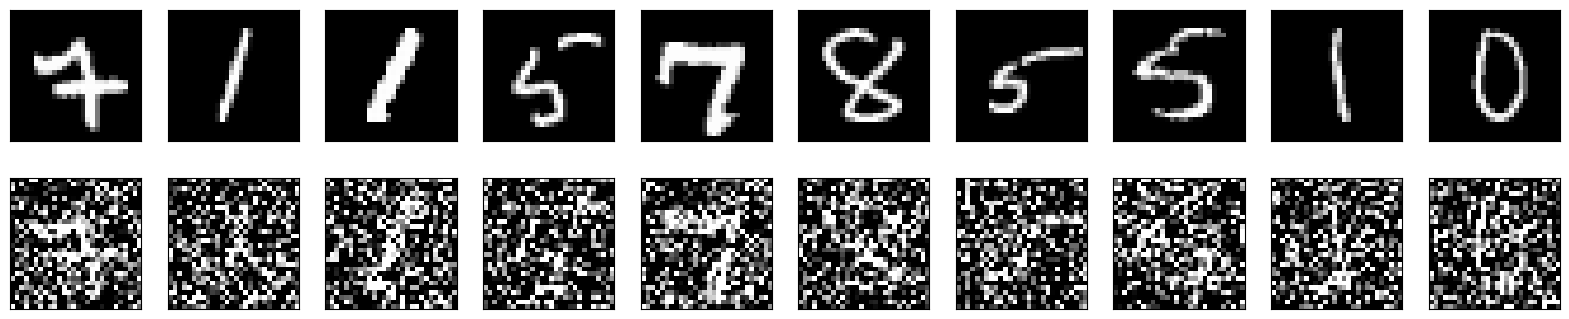

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## Build the autoencoder

We are going to use the Functional API to build our autoencoder.

# **Fully connected autoencoder**

In [ ]:
encoding_dim = 10

# reshape data (28,28,1)->(784)
train_data = train_data.reshape(-1,784)
test_data = test_data.reshape(-1,784)
noisy_train_data = noisy_train_data.reshape(-1,784)
noisy_test_data = noisy_test_data.reshape(-1,784)

# This is our input image
input_img = layers.Input(shape=(784))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
#encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
#decoded = layers.Dropout(0.2)(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder = Model(input_img, encoded)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
 dense_20 (Dense)            (None, 256)               2816      
                                                                 
 dense_21 (Dense)            (None, 512)               131584    
                                                                 
 dense_22 (Dense)            (None, 784)               4021

# **Convolutional autoencoder**

Should work better than the fully connected one

In [ ]:
'''
# Autoencoder with convolutional network
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
'''

'\n# Autoencoder with convolutional network\ninput = layers.Input(shape=(28, 28, 1))\n\n# Encoder\nx = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)\nx = layers.MaxPooling2D((2, 2), padding="same")(x)\nx = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)\nx = layers.MaxPooling2D((2, 2), padding="same")(x)\n\n# Decoder\nx = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)\nx = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)\nx = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)\n\n# Autoencoder\nautoencoder = Model(input, x)\nautoencoder.compile(optimizer="adam", loss="binary_crossentropy")\nautoencoder.summary()\n'

Let's train the autoencoder using the noisy
data as our input and the clean data as our target. We want our autoencoder to
learn how to denoise the images.

In [ ]:
history = autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 0.2230 - val_loss: 0.1785
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1730 - val_loss: 0.1665
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1631 - val_loss: 0.1605
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1564 - val_loss: 0.1565
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1515 - val_loss: 0.1540
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1476 - val_loss: 0.1530
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1445 - val_loss: 0.1520
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1417 - val_loss: 0.1511
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1395 - val_loss: 0.1507
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1374 - val_loss: 0.1509

# Plot history

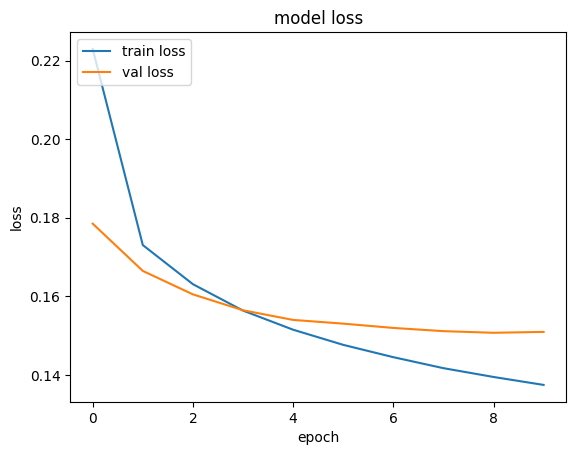

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

Let's now predict on the noisy data and display the results of our autoencoder.

Notice how the autoencoder does an amazing job at removing the noise from the
input images.

313/313 [==============================] - 1s 2ms/step


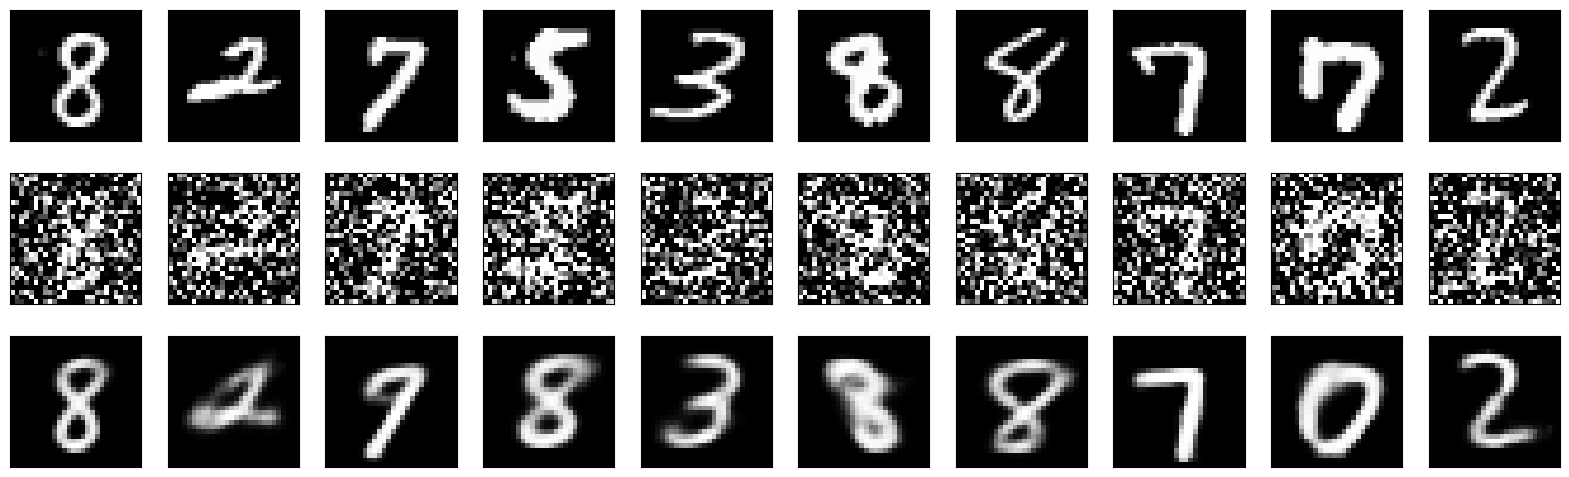

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display3(test_data,noisy_test_data, predictions)

# **Another use of autoencoders: <font color='green'> outliers detection**

The autoencoder training is an unsupervised training which is repeated until the error between original data and decoding data is minimised. This error is called **reconstruction error**.

One of the applications of autoencoders is as a technique to **detect outliers**. Notice that outliers are observations that “stand out” from the norm of a dataset. Then, if the model trains with a given dataset, outliers will be higher reconstruction error, so outliers will be easy to detect by using this neural network.

**Practical case**

Let’s see a toy example of autoencoder as a outliers detector. Imagine we have a dataset of more than 7000 observations. Let’s divide the sample in a training part with 80% of the entries and a test part with 20% of the sample. We assure that in the training dataset there are not any outliers so that the neural network trains only with inliers. Meanwhile, there are only 17 outliers in the test dataset.

The goal is to find the outliers in the test dataset after training with the training dataset. By using an autoencoder, it detects 9 out of 17 real outliers. There are not any false positives, although there are false negatives because some of the outliers have not been found.

<img src='https://quantdare.com/wp-content/uploads/2019/07/example_autoencoder.png' width=500p>

###**Nice article how to detect the outliers using autoencoders:**

https://towardsdatascience.com/outlier-detection-with-autoencoders-6c7ac3e2aa90

<iframe width="560" height="315" src="https://www.youtube.com/embed/n2gE7n11h1Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

#<font color='green'> **Summary:**

* We have learned about new methods:

  * Transfer learning
  * Reinforcement learning
  * Autoencoders

* **There are many other Machine Learning techniques like:**
  * Bayesian Neural Networks and Mixture Density Networks MDN returning the probability distribution,
  * Language processing networks (small chatGPT or google translators),
  * recurent networks with memory,
  * and many, many others...

* **Please prepare your projects!!!**  